## Import Libraries

In [3]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Conv2D, BatchNormalization, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

## Load Data

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Preprocessing

First, we need to examine the data shape to see how we have to treat the data.

In [7]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

To normalize the pixel value, each pixel is divided by 225 to change the range of the pixel values from 0 to 1 

In [8]:
X_train, X_test = X_train/255.0, X_test/255.0

From the data shape, we found the data is only 2D, but the convolution expect the data consist of 3 dimmensions (height x width x color). The `np.expand_dims()` function would help us to fulfil such need. 

In [9]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [10]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
# Check number of classes
K = len(set(y_train))
print(f'Number of classes : {K}')

Number of classes : 10


## Create CNN Image Classifier

Image classification problem need special component prior to the traditional ANN model. The component, that called convolutional layer, would act as featue extractor that would collect the feature from the images to make a feature map. The convolution layer I made consist of three sequence of:
* Conv2D --> To extract the features
* BatchNormalization --> To normalze the feature map 
* Conv2D
* BatchNormalization
* MaxPooling2D --> To reduce the size of the feature map

Then the 2D feature map is flattened into 1D array. And finally, the data is ready to be feed into the ANN layer.

The input layer consist of 1024 nodes which encode the input using the ReLu activation function. The softmax activation function is applied to the output layer to decode the output into the the prediction result. Dropout layer is used in two places, between flattening and input layer, and between input and output layer. The dropout layer will act as a regularisation parameter that will reduce the overfitting.

In [12]:
# Make the model using TensorFlow functional API
i = Input(shape=X_train[0].shape)

# Convolutional Layers {Conv --> BatchNorm --> Conv --> BatchNorm --> MaxPooling (3x)}
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# Neural Networks Layer
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

The model is trained using an augmented dataset to increase the generalisation of the model. Data augmentation simply can be understood as a trick to retrieve more data from the existing dataset. For example, we have a picture of a dog. By rotating the image, we can retrieve several different images to enrich the model's knowledge about a dog

In [ ]:
# Compile
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

# Fit The Model
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15


/Users/advendio/Documents/DSTI/Career/Adamata/trash-classification/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 275s 144ms/step - accuracy: 0.7482 - loss: 0.7658 - val_accuracy: 0.8588 - val_loss: 0.3859
Epoch 2/15


2024-05-19 14:57:15.376140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/Cellar/python@3.11/3.11.8/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8588 - val_loss: 0.3859
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 266s 142ms/step - accuracy: 0.8571 - loss: 0.3831 - val_accuracy: 0.8353 - val_loss: 0.4335
Epoch 4/15


2024-05-19 15:01:48.908543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8353 - val_loss: 0.4335
Epoch 5/15
 106/1875 ━━━━━━━━━━━━━━━━━━━━ 4:25 150ms/step - accuracy: 0.8896 - loss: 0.3066

## Model Evaluation

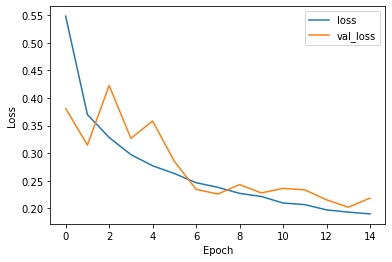

In [11]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

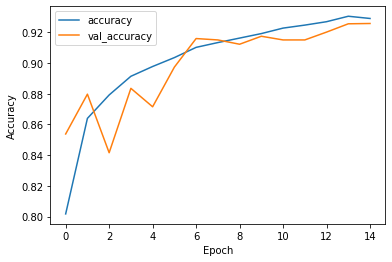

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

By looking at the historical loss and accuracy per iteration, we can say the model is doing quite good generalisation to the data.

Confusion matrix, without normalization
[[901   1   8  12   2   0  70   0   6   0]
 [  0 992   0   7   0   0   0   0   1   0]
 [ 22   3 850   9  69   0  47   0   0   0]
 [ 10   8   9 929  26   0  17   0   1   0]
 [  1   1  16  20 934   0  23   0   5   0]
 [  0   0   0   0   0 981   0  15   0   4]
 [ 98   1  30  23 109   0 735   0   4   0]
 [  0   0   0   0   0   6   0 970   0  24]
 [  1   0   0   0   0   1   2   0 995   1]
 [  0   0   0   0   0   7   0  22   1 970]]


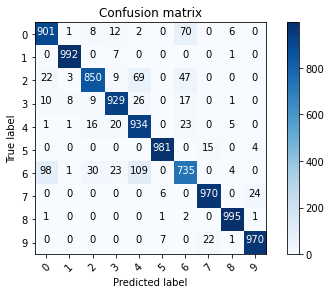

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [15]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

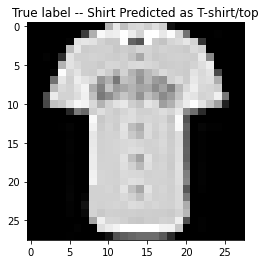

In [17]:
# Show misclassified examplexs
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title(f'True label -- {labels[y_test[i]]} Predicted as {labels[p_test[i]]}')
plt.show()